<a href="https://colab.research.google.com/github/panchamdesai777/Hackathons/blob/master/Insurance_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Churn Prediction**

---

![alt text](https://analyticsindiamag.com/wp-content/uploads/2020/04/Insurance_Churn-scaled.jpg)


### **Description:**

Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behaviour to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

### **Dataset Description :** 

Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.
You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry

### **Overview of Train Data**

![alt text](https://www.machinehack.com/wp-content/uploads/2020/04/Screenshot-2020-04-22-at-12.04.50-PM-1024x201.png)


### **Overview of Test Data**

![alt text](https://www.machinehack.com/wp-content/uploads/2020/04/Screenshot-2020-04-22-at-12.06.59-PM-1024x212.png)

### **Sample Submission File**

![alt text](https://www.machinehack.com/wp-content/uploads/2020/04/Screenshot-2020-04-22-at-12.08.22-PM.png)



In [0]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [35]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (3).csv


In [36]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.28,-0.42,1.34,-0.01,0.08,1.08,0.18,3,0,1,0,0,0,0,10,2,1
1,0.85,0.15,0.50,-0.98,-0.57,-0.41,-0.25,4,1,2,0,1,0,0,0,3,0
2,0.95,-0.17,1.83,-0.70,0.08,-0.41,-0.25,6,1,2,0,0,0,0,5,3,0
3,0.85,-0.38,0.98,-0.04,-0.57,-0.41,-0.25,4,0,2,0,1,0,0,5,3,0
4,1.32,1.59,-1.18,-0.10,-0.25,-0.41,-0.25,0,1,1,0,0,0,0,8,3,0


In [37]:
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)


            Total  Percent
labels          0     0.00
feature_7       0     0.00
feature_1       0     0.00
feature_2       0     0.00
feature_3       0     0.00
feature_4       0     0.00
feature_5       0     0.00
feature_6       0     0.00
feature_8       0     0.00
feature_15      0     0.00
feature_9       0     0.00
feature_10      0     0.00
feature_11      0     0.00
feature_12      0     0.00
feature_13      0     0.00
feature_14      0     0.00
feature_0       0     0.00


In [38]:
#Check For Class Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df['labels'])

0   88.30
1   11.70
Name: labels, dtype: float64

In [7]:
# Function to detect outliers in every feature
'''def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)'''

,Feature,Number of Outliers
0,feature_0,368
1,feature_1,3537
2,feature_2,0
3,feature_3,2420
4,feature_4,3248
5,feature_5,6156
6,feature_6,6156
7,feature_7,0
8,feature_8,0
9,feature_9,0


In [8]:
# Treat Outliers
'''from scipy.stats.mstats import winsorize
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)

# Checking for outliers after applying winsorization
detect_outliers(df)'''

,Feature,Number of Outliers
0,feature_0,0
1,feature_1,3523
2,feature_2,0
3,feature_3,0
4,feature_4,0
5,feature_5,6156
6,feature_6,6156
7,feature_7,0
8,feature_8,0
9,feature_9,0


## **Applying Classification ALgorithm without treating imbalnce**

---



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8980
           1       0.62      0.23      0.33      1193

    accuracy                           0.89     10173
   macro avg       0.76      0.60      0.64     10173
weighted avg       0.87      0.89      0.87     10173

ROC_AUC_SCORE is 0.6048112411487202


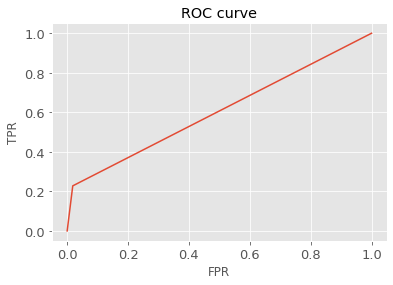

F1 SCORE: 0.3337423312883436
AUC Score = 60.48 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8980
           1       0.45      0.47      0.46      1193

    accuracy                           0.87     10173
   macro avg       0.69      0.70      0.69     10173
weighted avg       0.87      0.87      0.87     10173

ROC_AUC_SCORE is 0.6966471548024201


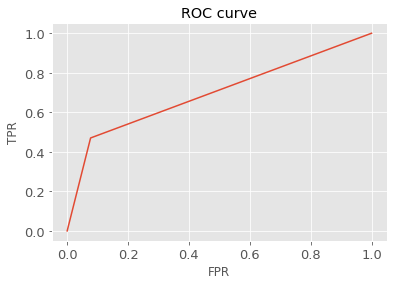

F1 SCORE: 0.45889570552147235
AUC Score = 69.66 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8980
           1       0.64      0.40      0.49      1193

    accuracy                           0.90     10173
   macro avg       0.78      0.69      0.72     10173
weighted avg       0.89      0.90      0.89     10173

ROC_AUC_SCORE is 0.6854689194764558


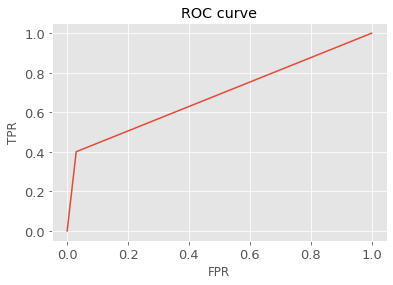

F1 SCORE: 0.4932920536635707
AUC Score = 68.55 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8980
           1       0.67      0.36      0.47      1193

    accuracy                           0.90     10173
   macro avg       0.79      0.67      0.71     10173
weighted avg       0.89      0.90      0.89     10173

ROC_AUC_SCORE is 0.6678834590045496


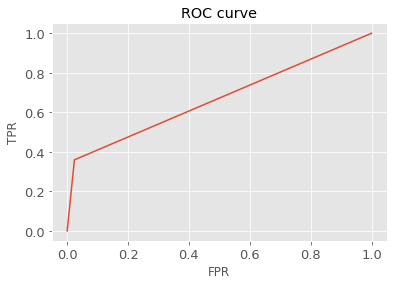

F1 SCORE: 0.4673202614379085
AUC Score = 66.79 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8980
           1       0.65      0.39      0.48      1193

    accuracy                           0.90     10173
   macro avg       0.79      0.68      0.72     10173
weighted avg       0.89      0.90      0.89     10173

ROC_AUC_SCORE is 0.6789828192294696


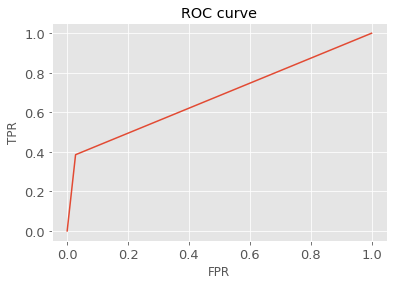

F1 SCORE: 0.4839558127301421
AUC Score = 67.90 %
On Model - 
Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8980
           1       0.65      0.46      0.54      1193

    accuracy                           0.91     10173
   macro avg       0.79      0.71      0.74     10173
weighted avg       0.90      0.91      0.90     10173

ROC_AUC_SCORE is 0.7141709620148714


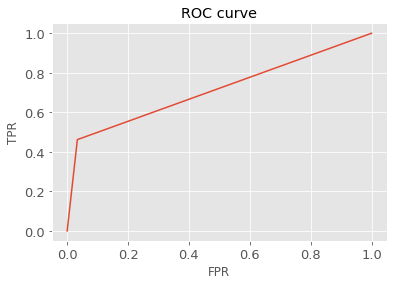

F1 SCORE: 0.5388753056234719
AUC Score = 71.42 %
On Model - 
Lightgbm Classifier


In [39]:
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.metrics import f1_score
#Applying Classification algorithms without treating imbalance

from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.3,random_state=9)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    F1_score=f1_score(y_val, y_scores)
    print('F1 SCORE:',F1_score)
    return auc

# Predictors
X = df.iloc[:,:-1]

# Target
y = df.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier,'Lightgbm Classifier':LGBMClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)

## **Applying Clasification Algorithm after treating imbalance**

---



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8902
           1       0.82      0.82      0.82      9063

    accuracy                           0.82     17965
   macro avg       0.82      0.82      0.82     17965
weighted avg       0.82      0.82      0.82     17965

ROC_AUC_SCORE is 0.8178956458786348


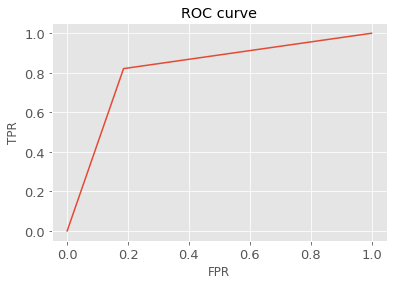

F1 SCORE: 0.8198093978956646
AUC Score = 81.79 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8902
           1       0.90      0.91      0.91      9063

    accuracy                           0.91     17965
   macro avg       0.91      0.91      0.91     17965
weighted avg       0.91      0.91      0.91     17965

ROC_AUC_SCORE is 0.9057374607806018


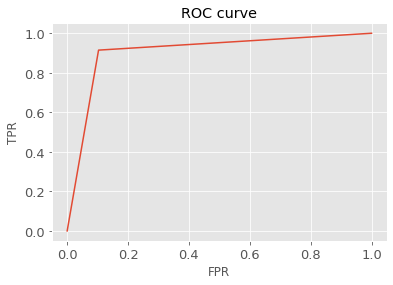

F1 SCORE: 0.9073891625615763
AUC Score = 90.57 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8902
           1       0.94      0.96      0.95      9063

    accuracy                           0.95     17965
   macro avg       0.95      0.95      0.95     17965
weighted avg       0.95      0.95      0.95     17965

ROC_AUC_SCORE is 0.9490676153368914


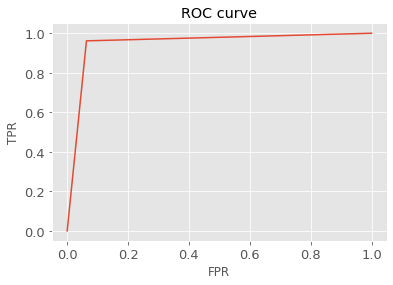

F1 SCORE: 0.9502208167493593
AUC Score = 94.91 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      8902
           1       0.91      0.94      0.92      9063

    accuracy                           0.92     17965
   macro avg       0.92      0.92      0.92     17965
weighted avg       0.92      0.92      0.92     17965

ROC_AUC_SCORE is 0.9190279987465361


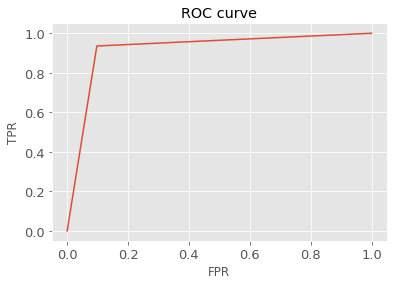

F1 SCORE: 0.9211298207495926
AUC Score = 91.90 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8902
           1       0.91      0.93      0.92      9063

    accuracy                           0.92     17965
   macro avg       0.92      0.92      0.92     17965
weighted avg       0.92      0.92      0.92     17965

ROC_AUC_SCORE is 0.9207259845352731


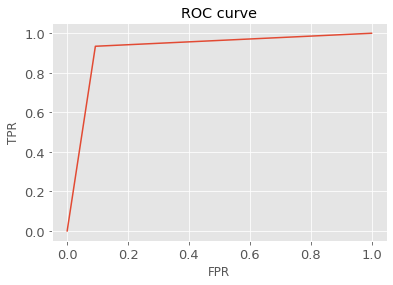

F1 SCORE: 0.9225237005557372
AUC Score = 92.07 %
On Model - 
Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8902
           1       0.95      0.94      0.95      9063

    accuracy                           0.95     17965
   macro avg       0.95      0.95      0.95     17965
weighted avg       0.95      0.95      0.95     17965

ROC_AUC_SCORE is 0.9451450185950896


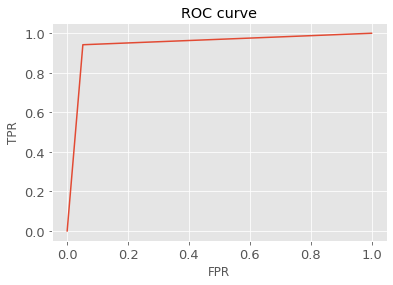

F1 SCORE: 0.9453981614796766
AUC Score = 94.51 %
On Model - 
Lightgbm Classifier


In [40]:
#Lets Treat Class Imbalance using Smote
from imblearn.over_sampling import SMOTE
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier,'Lightgbm Classifier':LGBMClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X_sm, y_sm, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=9, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5954
           1       0.95      0.94      0.94      6023

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

F1 SCORE: 0.9419419419419419


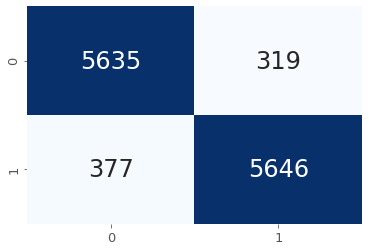

In [98]:
#lgbm with Smote
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
X1=df.drop('labels',1)
y1=df['labels']
lgb_model=LGBMClassifier(boosting_type='gbdt',learning_rate=0.01,n_estimators=1000,random_state=9)
smote = SMOTE(ratio='minority')
X1_sm, y1_sm = smote.fit_sample(X1, y1)
x_train,x_test,y_train,y_test= train_test_split(X1_sm,y1_sm,test_size=0.2,random_state=18)
lgb_model.fit(x_train,y_train)
y_pred=lgb_model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

class_report=classification_report(y_test,y_pred)
print(class_report)
F1_score=f1_score(y_test, y_pred)
print('F1 SCORE:',F1_score)

In [102]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
# Code starts here
X3=df.drop('labels',1)
y3=df['labels']
bagging_clf=BaggingClassifier(lgb_model,random_state=9)
smote = SMOTE(ratio='minority')
X3_sm, y3_sm = smote.fit_sample(X3, y3)
x_train,x_test,y_train,y_test= train_test_split(X3_sm,y3_sm,test_size=0.2,random_state=18)
bagging_clf.fit(x_train,y_train)
y_pred_bg=bagging_clf.predict(x_test)

class_report=classification_report(y_test,y_pred_bg)
print(class_report)
F1_score=f1_score(y_test, y_pred_bg)
print('F1 SCORE:',F1_score)

BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.01,
                                                max_depth=-1,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0.0,
                                                n_estimators=1000, n_jobs=-1,
                                                num_leaves=31, objective=None,
                                                random_state=9, reg_alpha=0.0,
                                                reg_lambda=0.0, silent=True,
                                                subsample=1.0,
    

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5954
           1       0.94      0.94      0.94      6023

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

F1 SCORE: 0.9406673878671882


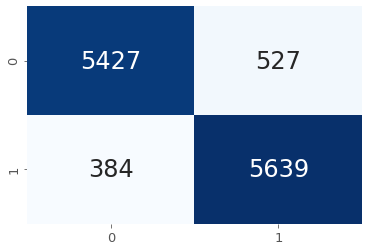

In [89]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_bg)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [65]:
#Ensemble method : (2nd highest accuracy)
from sklearn.ensemble import VotingClassifier
X2=df.drop('labels',1)
y2=df['labels']
X2_sm, y2_sm = smote.fit_sample(X, y)
x_train,x_test,y_train,y_test= train_test_split(X2_sm,y2_sm,test_size=0.2,random_state=18)
voting_clf_soft=VotingClassifier(estimators =[('rf',RandomForestClassifier()),('lgb',LGBMClassifier())], voting = 'soft')
voting_clf_soft.fit(x_train, y_train)
y_pred_vote=voting_clf_soft.predict(x_test)
class_report=classification_report(y_test,y_pred_vote)
print(class_report)
F1_score=f1_score(y_test, y_pred_vote)
print('F1 SCORE:',F1_score)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5954
           1       0.95      0.95      0.95      6023

    accuracy                           0.95     11977
   macro avg       0.95      0.95      0.95     11977
weighted avg       0.95      0.95      0.95     11977

F1 SCORE: 0.948970308493921


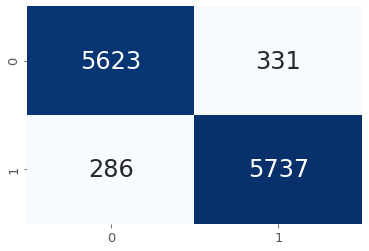

In [66]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_vote)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [67]:
#Hyperparameter tuning of random forest

def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_
X5=df.drop('labels',1)
y5=df['labels']
X5_sm, y5_sm = smote.fit_sample(X, y)

grid_search_random_forrest(X5_sm,y5_sm)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [71]:
#Applying Random Forest with best tuned Features
X7=df.drop('labels',1)
y7=df['labels']
smote = SMOTE(ratio='minority')
X7_sm, y7_sm = smote.fit_sample(X1, y1)
rfc_model=RandomForestClassifier(criterion='gini',max_features='auto',random_state=9)
x_train,x_test,y_train,y_test= train_test_split(X7_sm,y7_sm,test_size=0.2,random_state=18)
rfc_model.fit(x_train,y_train)
y_pred_rfc=rfc_model.predict(x_test)
class_report=classification_report(y_test,y_pred_rfc)
print(class_report)
F1_score=f1_score(y_test, y_pred_rfc)
print('F1 SCORE:',F1_score)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5954
           1       0.94      0.96      0.95      6023

    accuracy                           0.95     11977
   macro avg       0.95      0.95      0.95     11977
weighted avg       0.95      0.95      0.95     11977

F1 SCORE: 0.9498520223610655


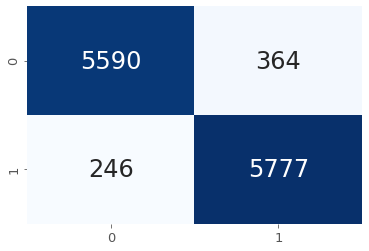

In [73]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [113]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
# Code starts here
X3=df.drop('labels',1)
y3=df['labels']
bagging_clf_rf=BaggingClassifier(rfc_model,random_state=9)
smote = SMOTE(ratio='minority')
X3_sm, y3_sm = smote.fit_sample(X3, y3)
x_train,x_test,y_train,y_test= train_test_split(X3_sm,y3_sm,test_size=0.2,random_state=18)
bagging_clf_rf.fit(x_train,y_train)
y_pred_bg_rf=bagging_clf_rf.predict(x_test)

class_report=classification_report(y_test,y_pred_bg_rf)
print(class_report)
F1_score=f1_score(y_test, y_pred_bg)
print('F1 SCORE:',F1_score)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5954
           1       0.93      0.96      0.94      6023

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

F1 SCORE: 0.9406673878671882


In [114]:
#Ensemble method: Best acccracy
from sklearn.ensemble import VotingClassifier
X2=df.drop('labels',1)
y2=df['labels']
X2_sm, y2_sm = smote.fit_sample(X, y)
x_train,x_test,y_train,y_test= train_test_split(X2_sm,y2_sm,test_size=0.2,random_state=18)
voting_clf_soft=VotingClassifier(estimators =[('rf_bg',bagging_clf_rf),('lgb_bg',bagging_clf)], voting = 'soft')
voting_clf_soft.fit(x_train, y_train)
y_pred_vote=voting_clf_soft.predict(x_test)
class_report=classification_report(y_test,y_pred_vote)
print(class_report)
F1_score=f1_score(y_test, y_pred_vote)
print('F1 SCORE:',F1_score)

VotingClassifier(estimators=[('rf_bg',
                              BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                      ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features='auto',
                                                                                      max_leaf_nodes=None,
                                                                                      max_samples=None,
                                                                                      min_impurity_decrease=0.0,
                

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5954
           1       0.94      0.95      0.95      6023

    accuracy                           0.94     11977
   macro avg       0.95      0.94      0.94     11977
weighted avg       0.95      0.94      0.94     11977

F1 SCORE: 0.9456674086899167


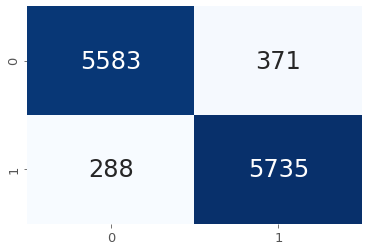

In [115]:
 from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_vote)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# **TEST DATA**

---



In [53]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (2).csv


In [116]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
test_df = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.57,0.41,0.98,0.01,-0.57,-0.41,-0.25,0,1,1,0,0,0,0,11,3
1,-1.12,-0.17,0.50,-0.32,0.72,0.55,0.18,0,2,1,0,0,0,0,5,1
2,0.48,0.15,-0.58,-0.69,-0.25,-0.41,-0.25,0,1,1,0,0,0,0,1,3
3,1.61,-0.45,1.83,-0.98,7.18,-0.41,-0.25,1,1,0,0,1,0,0,5,3
4,-0.94,-0.36,-1.18,-0.32,0.08,-0.41,-0.25,8,2,1,0,1,0,2,8,3


In [27]:
# Function to detect outliers in every feature
'''def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(test_df)'''

,Feature,Number of Outliers
0,feature_0,83
1,feature_1,1201
2,feature_2,0
3,feature_3,826
4,feature_4,763
5,feature_5,2101
6,feature_6,2101
7,feature_7,0
8,feature_8,0
9,feature_9,0


In [28]:
'''# Treat Outliers
from scipy.stats.mstats import winsorize
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


test_df = treat_outliers(test_df)

# Checking for outliers after applying winsorization
detect_outliers(test_df)'''

,Feature,Number of Outliers
0,feature_0,0
1,feature_1,1198
2,feature_2,0
3,feature_3,0
4,feature_4,0
5,feature_5,2101
6,feature_6,2101
7,feature_7,0
8,feature_8,0
9,feature_9,0


In [0]:
test_df['labels']=voting_clf_soft.predict(test_df)



In [0]:
A=test_df['labels']
A=pd.DataFrame(A)

In [0]:
A.to_excel('rfctuned(bagging)_lgb(bagging)_vote.xlsx')

In [0]:
from google.colab import files
files.download('rfctuned(bagging)_lgb(bagging)_vote.xlsx')